In [1]:
!pip install pytrends


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install pandas-ta


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [3]:

import yfinance as yf
import pandas as pd
import requests
import pandas_ta as ta
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt


Exploración de datos

In [4]:

indices_top5 = {
    "SP500": "^GSPC",
    "DowJones": "^DJI",
    "Nasdaq100": "^NDX",
    "EuroStoxx50": "^STOXX50E",
    "Nikkei225": "^N225"
}


start_date = "2020-09-30"
end_date = "2025-10-24" # Un día después para incluir el 30/09/2025
btc = yf.download("BTC-USD", start=start_date, end=end_date)


for name, ticker in indices_top5.items():
    df_idx = yf.download(ticker, period="4y")[["Close"]].rename(columns={"Close": f"{name}_Close"})
    btc = btc.merge(df_idx, left_index=True, right_index=True, how="left")


btc["DayOfWeek"] = btc.index.day_name()
btc["Mes"] = btc.index.to_series().dt.month_name()
btc["Year"] = btc.index.year.astype(str)


btc.rename(columns={
    "Close": "btc_c",
    "High": "btc_h",
    "Low": "btc_l",
    "Open": "btc_o",
    "Volume": "btc_v",
    "SP500_Close": "sp500_c",
    "DowJones_Close": "dowj_c",
    "Nasdaq100_Close": "nasdaq_c",
    "EuroStoxx50_Close": "eurostoxx_c",
    "Nikkei225_Close": "nikkei_c",
    "DayOfWeek": "day",
    "Mes": "month",
    "NextClose_BTC": "btc_next_c" 
}, inplace=True)


for i in range(1, 8):
    btc[f"btc_prev_c{i}"] = btc["btc_c"].shift(i)


for i in range(1, 8):
    btc[f"NextClose_BTC{i}"] = btc["btc_c"].shift(-i)

btc['is_month_start'] = btc.index.is_month_start.astype(int)
btc['is_month_end'] = btc.index.is_month_end.astype(int)



for i in range(1, 8):
    btc[f"btc_pct_prev{i}"] = ((btc["btc_c"].squeeze() - btc[f"btc_prev_c{i}"].squeeze()) / btc[f"btc_prev_c{i}"].squeeze()) * 100


btc.columns = [col if isinstance(col, str) else col[0] for col in btc.columns]



btc

/var/folders/_3/9ky5qgzn2f733_p25r49fl700000gn/T/ipykernel_72720/139229345.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/_3/9ky5qgzn2f733_p25r49fl700000gn/T/ipykernel_72720/139229345.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_idx = yf.download(ticker, period="4y")[["Close"]].rename(columns={"Close": f"{name}_Close"})
[*********************100%***********************]  1 of 1 completed
/var/folders/_3/9ky5qgzn2f733_p25r49fl700000gn/T/ipykernel_72720/139229345.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_idx = yf.download(ticker, period="4y")[["Close"]].rename(columns={"Close": f"{name}_Close"})
[*********************100%***********************]  1 of 1 completed
/var/folders/_3/9ky5qgzn2f733_p25r49fl700000gn/T/ipyke

,btc_c,btc_h,btc_l,btc_o,btc_v,sp500_c,dowj_c,nasdaq_c,eurostoxx_c,nikkei_c,...,NextClose_BTC7,is_month_start,is_month_end,btc_pct_prev1,btc_pct_prev2,btc_pct_prev3,btc_pct_prev4,btc_pct_prev5,btc_pct_prev6,btc_pct_prev7
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-30,10784.491211,10847.256836,10669.321289,10843.871094,44171073700,NaN,NaN,NaN,NaN,NaN,...,10668.968750,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-01,10619.452148,10933.624023,10472.356445,10795.254883,40023134100,NaN,NaN,NaN,NaN,NaN,...,10915.685547,1,0,-1.530337,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-02,10575.974609,10657.837891,10416.689453,10619.821289,48661453918,NaN,NaN,NaN,NaN,NaN,...,11064.458008,0,0,-0.409414,-1.933486,NaN,NaN,NaN,NaN,NaN
2020-10-03,10549.329102,10598.940430,10511.129883,10575.100586,44660271563,NaN,NaN,NaN,NaN,NaN,...,11296.361328,0,0,-0.251944,-0.660326,-2.180558,NaN,NaN,NaN,NaN
2020-10-04,10669.583008,10686.000000,10534.391602,10550.440430,71251776995,NaN,NaN,NaN,NaN,NaN,...,11384.181641,0,0,1.139920,0.885104,0.472066,-1.065495,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-19,108666.710938,109488.992188,106157.789062,107204.312500,47657008953,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,1.369841,2.065340,0.444301,-1.910447,-3.935649,-5.729423,-5.646495
2025-10-20,110588.929688,111711.031250,107485.015625,108667.445312,63507793085,6735.129883,46706.578125,25141.019531,5680.930176,49185.500000,...,NaN,0,0,1.768912,3.162984,3.870786,2.221073,-0.175328,-2.236355,-4.061859
2025-10-21,108476.890625,113996.343750,107534.750000,110587.632812,101194375480,6735.350098,46924.738281,25127.130859,5686.830078,49316.058594,...,NaN,0,0,-1.909811,-0.174681,1.192766,1.887051,0.268844,-2.081791,-4.103455


In [5]:

url = "https://api.alternative.me/fng/?limit=0"

resp = requests.get(url)
data = resp.json()['data']  

fng = pd.DataFrame(data)

fng['timestamp'] = pd.to_datetime(fng['timestamp'], unit='s')  
fng.set_index('timestamp', inplace=True)
fng = fng[['value']]  
fng.rename(columns={'value': 'fng_value'}, inplace=True)

/var/folders/_3/9ky5qgzn2f733_p25r49fl700000gn/T/ipykernel_72720/1936217001.py:8: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  fng['timestamp'] = pd.to_datetime(fng['timestamp'], unit='s')


In [6]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

kw_list = ["bitcoin"]

timeframe = '2020-09-30 2025-10-24'

pytrends.build_payload(kw_list, timeframe=timeframe)
google_trends = pytrends.interest_over_time()

if 'isPartial' in google_trends.columns:
    google_trends = google_trends.drop(columns=['isPartial'])


In [7]:
btc.columns = [col if isinstance(col, str) else col[0] for col in btc.columns]
btc.index = pd.to_datetime(btc.index).normalize()
fng.index = fng.index.normalize()
btc = btc.merge(fng, left_index=True, right_index=True, how='left')
btc['fng_value'].fillna(method='ffill', inplace=True)
btc = btc.merge(google_trends, left_index=True, right_index=True, how="left")
btc['bitcoin'] = btc['bitcoin'].fillna(method="ffill")  

/var/folders/_3/9ky5qgzn2f733_p25r49fl700000gn/T/ipykernel_72720/3314141456.py:5: ChainedAssignmentError: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
When using the Copy-on-Write mode, such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object.


  btc['fng_value'].fillna(method='ffill', inplace=True)
/var/folders/_3/9ky5qgzn2f733_p25r49fl700000gn/T/ipykernel_72720/3314141456.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  btc['fng_value'].fillna(method='ffill', inplace=True)
/var/folders/_3/9ky5qgzn2f733_p25r49fl700000gn/T/ipykernel_72720/33141

In [8]:
btc.ta.rsi(close='btc_c', length=14, append=True)

btc.ta.bbands(close='btc_c', length=20, append=True)

btc.ta.macd(close='btc_c', fast=12, slow=26, append=True)

btc.ta.atr(high='btc_h', low='btc_l', close='btc_c', length=14, append=True)

Date
2020-09-30            NaN
2020-10-01            NaN
2020-10-02            NaN
2020-10-03            NaN
2020-10-04            NaN
                 ...     
2025-10-19    3893.149184
2025-10-20    3916.925359
2025-10-21    4098.687386
2025-10-22    3972.862060
2025-10-23    3956.240774
Freq: D, Name: ATRr_14, Length: 1850, dtype: float64

In [9]:
btc.columns = [col if isinstance(col, str) else col[0] for col in btc.columns]
train, not_train = train_test_split(btc, test_size=0.4, random_state=51)
validation, test = train_test_split(not_train, test_size=0.5, random_state=42)
train.to_csv('train.csv')
validation.to_csv('validation.csv')
test.to_csv('test.csv')
btc.to_csv('btc.csv')
train.columns

Index(['btc_c', 'btc_h', 'btc_l', 'btc_o', 'btc_v', 'sp500_c', 'dowj_c',
       'nasdaq_c', 'eurostoxx_c', 'nikkei_c', 'day', 'month', 'Year',
       'btc_prev_c1', 'btc_prev_c2', 'btc_prev_c3', 'btc_prev_c4',
       'btc_prev_c5', 'btc_prev_c6', 'btc_prev_c7', 'NextClose_BTC1',
       'NextClose_BTC2', 'NextClose_BTC3', 'NextClose_BTC4', 'NextClose_BTC5',
       'NextClose_BTC6', 'NextClose_BTC7', 'is_month_start', 'is_month_end',
       'btc_pct_prev1', 'btc_pct_prev2', 'btc_pct_prev3', 'btc_pct_prev4',
       'btc_pct_prev5', 'btc_pct_prev6', 'btc_pct_prev7', 'fng_value',
       'bitcoin', 'RSI_14', 'BBL_20_2.0_2.0', 'BBM_20_2.0_2.0',
       'BBU_20_2.0_2.0', 'BBB_20_2.0_2.0', 'BBP_20_2.0_2.0', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'ATRr_14'],
      dtype='object')

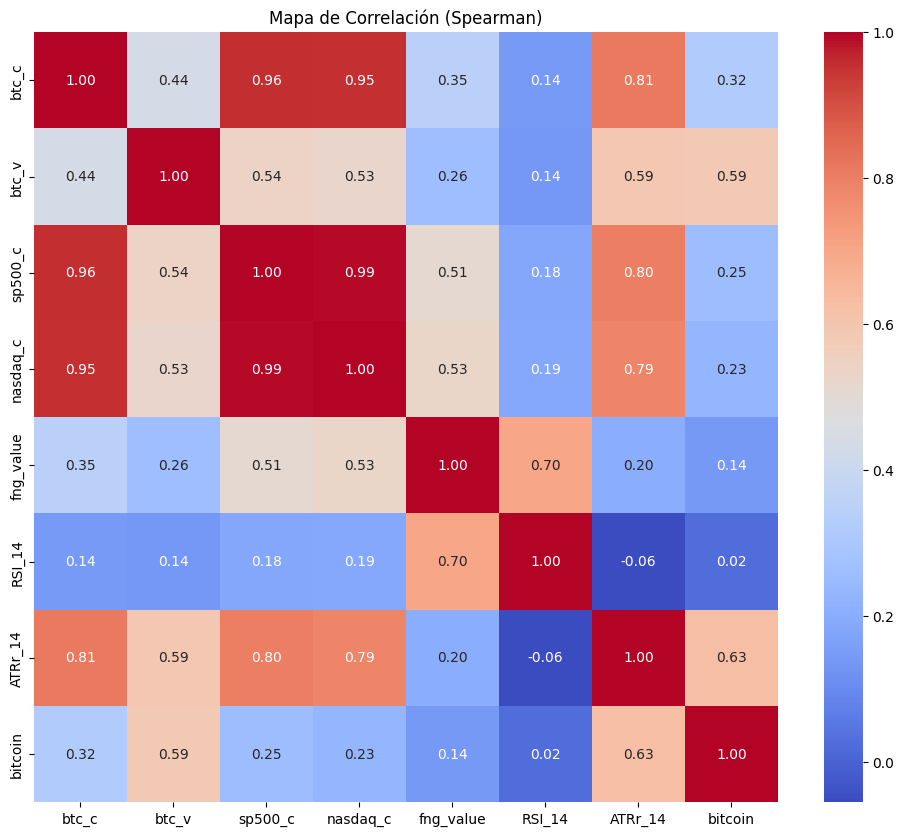

In [10]:
cols_to_corr = [
    'btc_c', 'btc_v',
    'sp500_c', 'nasdaq_c',
    'fng_value',             
    'RSI_14', 'ATRr_14',       
    'bitcoin'                  
]

cols_existentes = [c for c in cols_to_corr if c in btc.columns]

plt.figure(figsize=(12, 10))
sns.heatmap(btc[cols_existentes].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlación (Spearman)")
plt.show()

### 🔍 Observaciones del Análisis de Correlación

1.  **Alta Correlación con S&P 500 (0.96) y NASDAQ (0.95):**
    * Existe una correlación positiva extremadamente fuerte entre el precio de Bitcoin (`btc_c`) y el índice S&P 500 (`sp500_c`), asi como con el índice NASDAQ (`nasdaq_c`).
    * **Conclusión:** Bitcoin no se está comportando como un activo "descorrelacionado" o refugio en este periodo, sino que sigue muy de cerca los movimientos del mercado bursátil tradicional. Los factores macroeconómicos que afectan a la bolsa (tasas de interés, inflación) afectan directamente a BTC.

2.  **Volumen y Búsquedas (0.59):**
    * La variable `btc_v` (Volumen) tiene una correlación moderada-alta con `bitcoin` (Google Trends).
    * **Conclusión:** La atención pública y el "hype" son motores clave de la liquidez. Cuando las búsquedas aumentan, el volumen de transacciones sube, lo que sugiere una fuerte participación de inversores minoristas ('retail') basada en noticias o tendencias.

/var/folders/_3/9ky5qgzn2f733_p25r49fl700000gn/T/ipykernel_72720/2347394728.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=btc, x='day', y='btc_pct_prev1', order=dias_orden, ax=axes[0], palette="viridis")
/var/folders/_3/9ky5qgzn2f733_p25r49fl700000gn/T/ipykernel_72720/2347394728.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=btc, x='month', y='btc_pct_prev1', order=meses_orden, ax=axes[1], palette="magma")


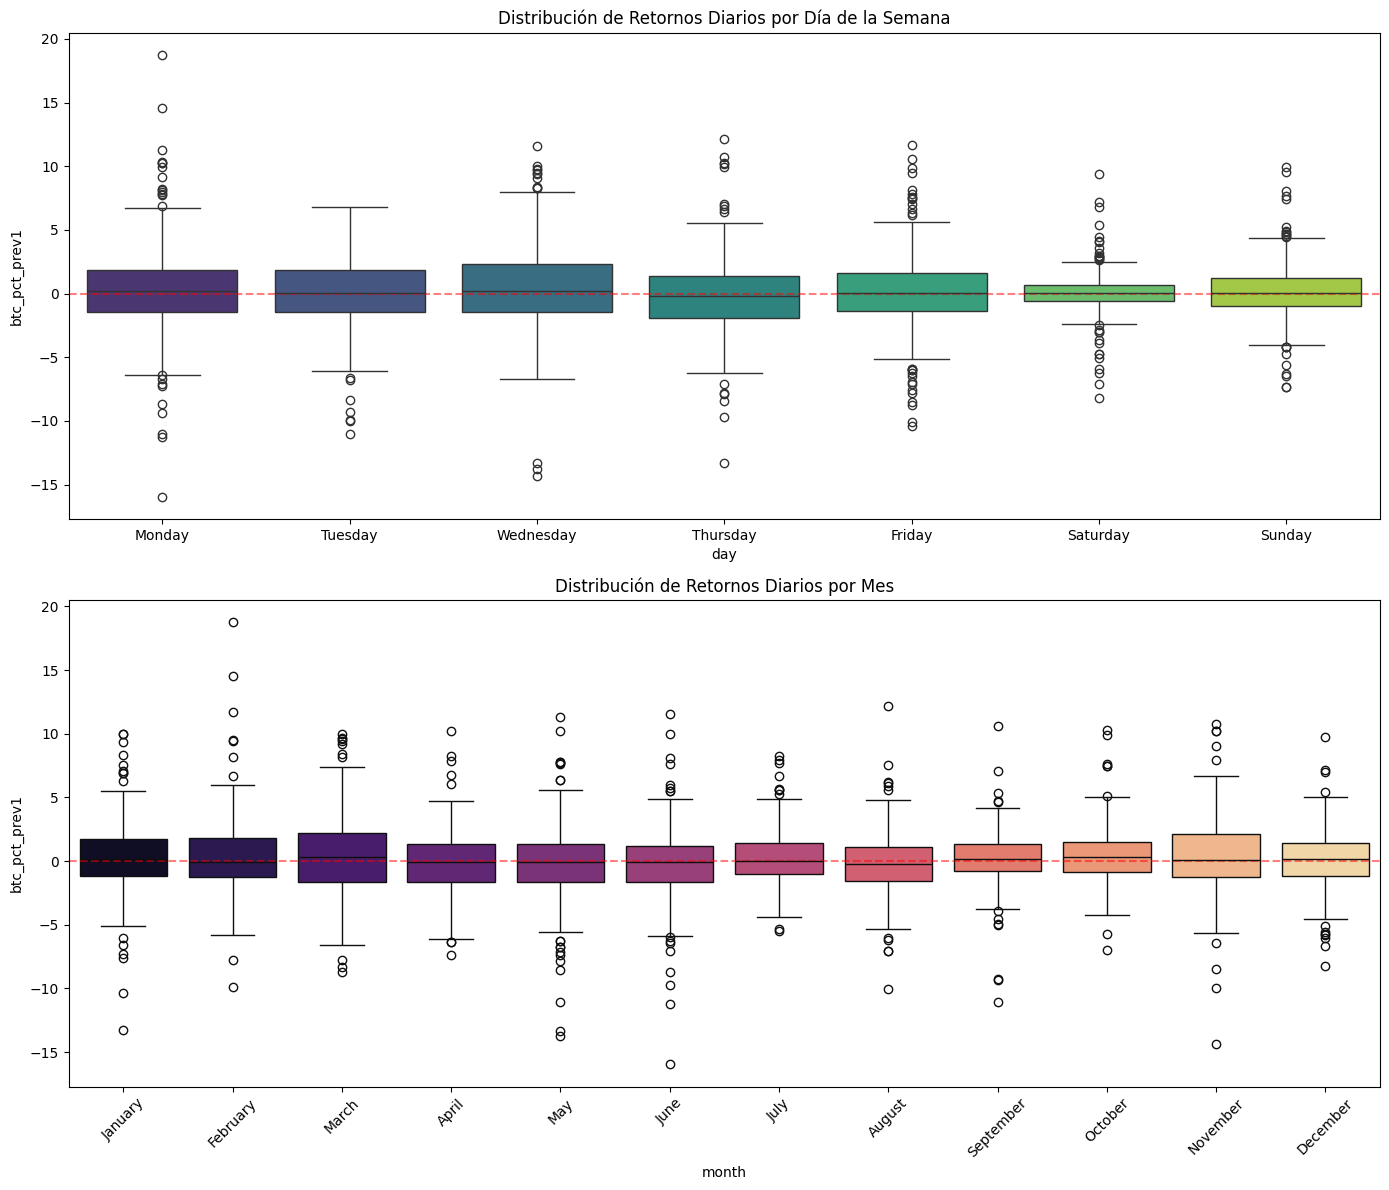

In [11]:
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
meses_orden = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Gráfico por Día de la Semana
sns.boxplot(data=btc, x='day', y='btc_pct_prev1', order=dias_orden, ax=axes[0], palette="viridis")
axes[0].set_title("Distribución de Retornos Diarios por Día de la Semana")
axes[0].axhline(0, color='red', linestyle='--', alpha=0.5)

# Gráfico por Mes
sns.boxplot(data=btc, x='month', y='btc_pct_prev1', order=meses_orden, ax=axes[1], palette="magma")
axes[1].set_title("Distribución de Retornos Diarios por Mes")
axes[1].axhline(0, color='red', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 🔍 Observaciones de Estacionalidad y Volatilidad

1.  **Efecto Fin de Semana (Weekly Seasonality):**
    * Al observar el gráfico superior, las cajas correspondientes a **Sábado** y **Domingo** son visiblemente más "cortas" (menor rango intercuartílico) y tienen bigotes más cortos que los días laborables.
    * **Conclusión:** Existe una compresión de volatilidad los fines de semana. Los grandes movimientos de precio ocurren mayoritariamente de Lunes a Viernes, coincidiendo con la operativa de instituciones financieras y mercados tradicionales.

2.  **Distribución Mensual:**
    * No se observa una estacionalidad mensual obvia que garantice ganancias siempre en un mismo mes. Sin embargo, meses como **Junio** y **Noviembre** muestran una mayor cantidad de *outliers* negativos (puntos debajo de la caja).
    * **Conclusión:** El activo presenta "colas pesadas" (fat tails), lo que implica un riesgo de caídas extremas (cisnes negros) superior al de una distribución normal, especialmente concentrados en ciertos periodos del año.

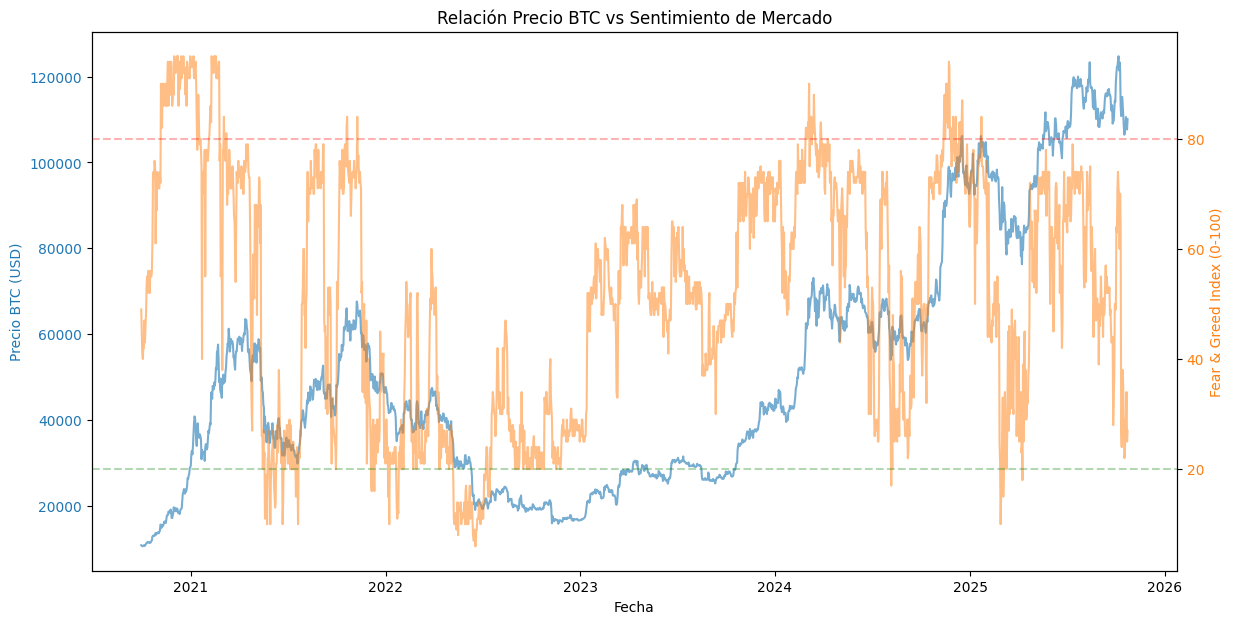

In [12]:
# Convertir a numérico forzosamente (los errores se vuelven NaN)
btc['fng_value'] = pd.to_numeric(btc['fng_value'], errors='coerce')

# Rellenar posibles NaN que hayan quedado (fng a veces no trae datos de fines de semana antiguos)
btc['fng_value'] = btc['fng_value'].ffill()
fig, ax1 = plt.subplots(figsize=(14, 7))

# Graficar Precio BTC (Eje izquierdo)
color = 'tab:blue'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio BTC (USD)', color=color)
ax1.plot(btc.index, btc['btc_c'], color=color, label='Precio BTC', alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# Graficar Fear & Greed (Eje derecho)
ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('Fear & Greed Index (0-100)', color=color)
ax2.plot(btc.index, btc['fng_value'], color=color, label='Fear & Greed', alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)
# Líneas de referencia para miedo/avaricia extrema
ax2.axhline(20, color='green', linestyle='--', alpha=0.3, label='Miedo Extremo')
ax2.axhline(80, color='red', linestyle='--', alpha=0.3, label='Avaricia Extrema')

plt.title("Relación Precio BTC vs Sentimiento de Mercado")
plt.show()

### 🔍 Análisis de Sentimiento de Mercado (Fear & Greed Index)

1.  **Correlación Visual Precio-Sentimiento:**
    * La línea naranja representa el *Fear & Greed Index* (eje derecho, escala 0-100), mientras que la línea azul muestra el precio de Bitcoin en USD (eje izquierdo).
    * Se observa que el sentimiento actúa como un indicador "adelantado" o coincidente de los ciclos de mercado. Los periodos de euforia (valores altos en naranja) suelen acompañar a los *bull runs* (subidas de precio), mientras que el pesimismo extremo (valores bajos) marca los *bear markets* (caídas).

2.  **Zonas de Extremos (Señales de Trading):**
    * **Zona de Avaricia Extrema (>80, línea roja punteada):** Históricamente, cuando el índice supera este umbral, el mercado suele estar sobrecalentado, lo que a menudo precede a correcciones o techos locales de precio.
    * **Zona de Miedo Extremo (<20, línea verde punteada):** Cuando el índice cae por debajo de 20, indica pánico en el mercado. Históricamente, estos niveles han coincidido con zonas de acumulación o suelos de precio a largo plazo.

3.  **Divergencias y Volatilidad:**
    * A diferencia del precio, que muestra tendencias más sostenidas, el sentimiento oscila con mucha mayor frecuencia y "ruido". Esto sugiere que, para utilizar esta variable en modelos predictivos, será necesario aplicar técnicas de suavizado (como medias móviles) para filtrar la volatilidad diaria y capturar la tendencia subyacente del sentimiento.